In [1]:
import pandas as pd

# load training data
df_train = pd.read_csv("/Users/huylenguyen/digiLab/FM-digiLab-2025/data/processed/pipe01/bss.csv", index_col=0)
print(len(df_train))

df_train.head()

448


,filename_signal,filename_baseline,label,temperature_diff,temperature,0,1,2,3,4,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,1,-1.49,17.16,-112931.661255,-112901.702602,-112871.485511,-112840.317123,-112808.640235,...,-16935.123350,-17041.495555,-17147.716537,-17253.892551,-17359.869603,-17465.053408,-17569.830919,-17674.628320,-17779.287155,-17883.576140
1,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,1,-1.28,17.16,-43987.817309,-43984.648832,-43981.154337,-43976.458186,-43971.119759,...,10960.846149,11766.482935,12559.021160,13331.996305,14111.691604,15052.423825,16053.129304,16970.736600,17867.943144,18860.812017
2,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,1,0.91,17.16,11133.869910,11124.320818,11114.885595,11105.870468,11097.079844,...,-41454.975206,-41540.412183,-41625.755887,-41711.073572,-41796.269106,-41880.976022,-41965.432886,-42049.899560,-42134.280281,-42218.437563
3,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,1,-1.39,17.16,-34951.660574,-34954.168716,-34956.241259,-34956.707693,-34956.315828,...,128774.008716,128912.721402,129051.343118,129189.938828,129328.411224,129466.374328,129604.079546,129741.810475,129879.459669,130016.864988
4,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,1,15.37,17.16,-47120.852063,-47102.468231,-47084.181251,-47066.252112,-47048.514159,...,-147305.810186,-147495.621781,-147685.255229,-147874.836647,-148064.183556,-148252.592837,-148440.522282,-148628.475400,-148816.265181,-149003.619216


In [22]:
1 - (2/len(df_train))

0.9955357142857143

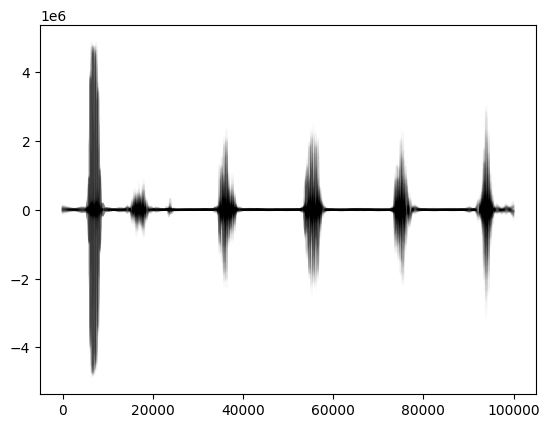

In [27]:
import matplotlib.pyplot as plt

plt.plot(df_train.iloc[:200][df_train.columns[5:]].values.T, c='k', alpha=0.01)
plt.show()

In [33]:
import numpy as np
from fm_processor import load_model, load_svd

# Run inference on BSS training data
svd = load_svd("/Users/huylenguyen/digiLab/FM-digiLab-2025/data/processed/pipe01")
model = load_model("/Users/huylenguyen/digiLab/FM-digiLab-2025/data/processed/pipe01")

data = df_train[df_train.columns[5:]]
data_svd = svd.transform(data)

data_input = np.hstack([df_train.temperature.values[:, np.newaxis], data_svd])

pred = model.predict(data_input)
pred

/Users/huylenguyen/digiLab/FM-digiLab-2025/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but TruncatedSVD was fitted without feature names



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

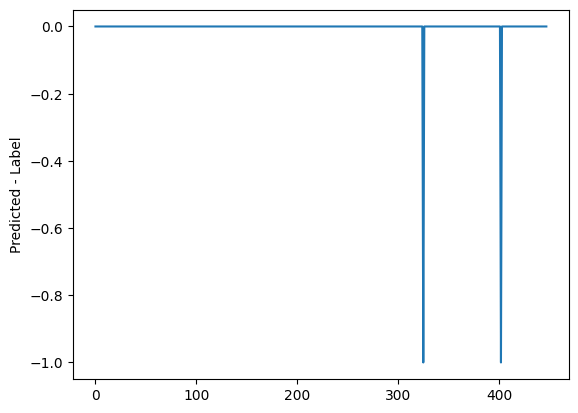

Incorrectly classified BSS samples: 2


In [34]:
import matplotlib.pyplot as plt

plt.plot(pred - df_train.label)
plt.ylabel("Predicted - Label")
plt.show()

print(f"Incorrectly classified BSS samples: {np.count_nonzero(pred - df_train.label)}")

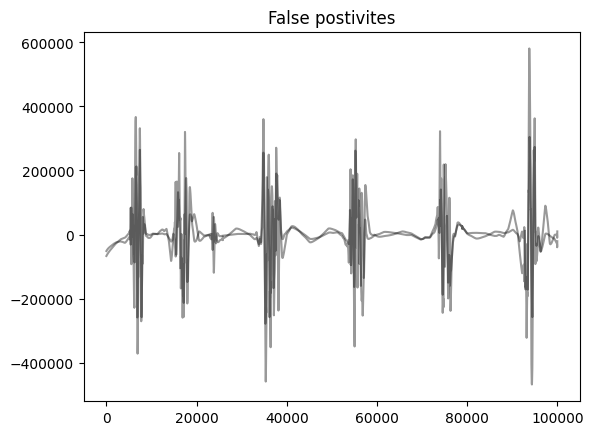

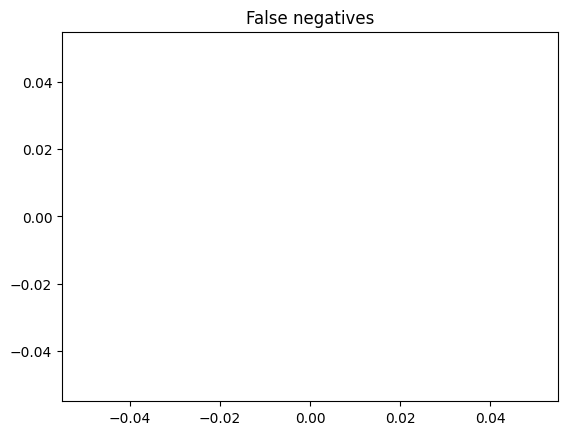

In [37]:
false_positives = np.where((pred - df_train.label) == -1)[0]
false_negatives = np.where((pred - df_train.label) == 1)[0]

plt.plot(df_train.iloc[false_positives][df_train.columns[5:]].values.T, c="k", alpha=0.4)
plt.title("False postivites")
plt.show()

plt.plot(df_train.iloc[false_negatives][df_train.columns[5:]].values.T, c="k", alpha=0.05)
plt.title("False negatives")
plt.show()

In [19]:
import os
from fm_processor import predict_file

# Run inference on test data with logic BSS
# this is actually just training data because we have no test samples
total = 0
correct = 0
for root, dirs, files in os.walk("/Users/huylenguyen/digiLab/FM-digiLab-2025/data/raw/pipe01/set09"):
    for file in files:
        if not file.startswith("."):
            label = "clean" not in file
            pred = predict_file(
                os.path.join(root, file),
                "/Users/huylenguyen/digiLab/FM-digiLab-2025/data/processed/pipe01"
            )
            print(f"{file}: {label} - {pred}, {label == pred}")

            total += 1
            correct += (label==pred)

correct, total

defect10_1716.npy: True - 1, True
defect05_1769.npy: True - 1, True
defect11_1701.npy: True - 1, True
clean07_1865.npy: False - 0, True
defect09_1726.npy: True - 1, True
clean09_1844.npy: False - 0, True
clean16_1625.npy: False - 0, True
clean08_1855.npy: False - 0, True
clean11_79.npy: False - 0, True
defect04_1779.npy: True - 1, True
clean02_1920.npy: False - 0, True
clean06_1876.npy: False - 0, True
clean03_1909.npy: False - 0, True
defect02_1801.npy: True - 1, True
defect03_1791.npy: True - 1, True
defect06_1758.npy: True - 1, True
defect07_1748.npy: True - 1, True
clean13_1658.npy: False - 0, True
clean05_1887.npy: False - 0, True
clean10_1834.npy: False - 0, True
clean12_1668.npy: False - 0, True
sticking_1822.npy: True - 1, True
clean01_1931.npy: False - 0, True
clean04_1899.npy: False - 0, True
clean15_1636.npy: False - 0, True
defect12_1689.npy: True - 1, True
defect01_1812.npy: True - 1, True
defect08_1738.npy: True - 1, True
clean14_1647.npy: False - 0, True


(np.int64(29), 29)

# Visualise data

Over a grid on the first two SVD dimensions

In [7]:
# create grid
bounds_x = data_input[:, 1].min(), data_input[:, 1].max()
bounds_y = data_input[:, 2].min(), data_input[:, 2].max()
bounds_temp = df_train.temperature.min(), df_train.temperature.max()

In [8]:
x, y, temp = np.meshgrid(
    np.linspace(bounds_x[0], bounds_x[1], 20),
    np.linspace(bounds_x[0], bounds_x[1],  20),
    np.linspace(bounds_temp[0], bounds_temp[1], 20)
)

grid = np.vstack([temp.ravel(), x.ravel(), y.ravel()]).T
grid.shape

(8000, 3)

In [9]:
# predict grid samples
grid_data = np.hstack((grid, np.zeros((grid.shape[0], svd.components_.shape[0]-2))))
pred_grid = model.predict(grid_data)

# split into defect and clean predictions
clean = np.argwhere(pred_grid == 0).flatten()
defect = np.argwhere(pred_grid == 1).flatten()

In [18]:
# plot results
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


fig = go.FigureWidget()
fig.add_scatter3d(x=grid[:, 1][clean], y=grid[:, 2][clean], z=grid[:, 0][clean], mode='markers', marker={'color': 'blue'})
fig.add_scatter3d(x=grid[:, 1][defect], y=grid[:, 2][defect], z=grid[:, 0][defect], mode='markers', marker={'color': 'red'})

fig.update_traces(marker=dict(
    size=4,
    line=dict(
        width=0,
        color='DarkSlateGrey')),
        selector=dict(mode='markers')
)


fig.show()